# AS04 - Clusterização e Classificação Textual
``Aluno``: Gustavo Martins Lopes da Costa

``Matrícula``: 690773

# Clusterização
O código abaixo é referente à clusterização do dataset
[20 News Groups Dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).


In [533]:
# Atualizando o scikit-learn para obter o algoritmo de HDBSCAN
!pip install scikit-learn==1.3.2

In [534]:
import sklearn
sklearn.__version__

'1.3.2'

In [535]:
import pandas as pd
import numpy as np

## 1. Obtendo o dataset
---

In [536]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [537]:
selected_categories = ['sci.space', 'comp.windows.x', '']
newsgroups_train = fetch_20newsgroups(subset='train')

<font color = "red">Importante</font>

Para que o notebook seja executado rapidamente, apenas uma parte dos dados está sendo considerada. Caso queira executar com o dataset inteiro comente a linha indicada na célula abaixo.

In [538]:
dataser = newsgroups_train.data
dataset = newsgroups_train.data[:20] # comente aqui para executar com todo o dataset
len(dataset)

20

## 2. Pré Processamento
---

In [539]:
import unicodedata
import re

In [540]:
def remove_accents(input_text):
  nfkd_form = unicodedata.normalize('NFKD', input_text)
  return u"".join([char for char in nfkd_form if not unicodedata.combining(char)])

In [541]:
def preprocess(dataset):
  preprocessed = []
  for text in dataset:
    normalized = text.lower()                                            # Colocando transformando o texto para lowercase
    normalized = remove_accents(normalized)                              # Remoção de accent
    normalized = re.sub('\.(?!(\$[^. ])\d)', '', normalized)             # Canonização de siglas, moeda, data e palavras com hífen
    normalized = re.sub('(?<!\d)[.,;!?\'\(\)#:-](?!\d)', '', normalized) # Remoção de pontuação e caracteres especiais
    normalized = re.sub(' +', ' ', normalized)                           # Remoção de espaços extras
    preprocessed.append(normalized)
  return preprocessed

In [542]:
preprocessed_dataset = preprocess(dataset)
preprocessed_dataset[0]

'from lerxst@wamumdedu wheres my thing\nsubject what car is this\nnntppostinghost rac3wamumdedu\norganization university of maryland college park\nlines 15\n\n i was wondering if anyone out there could enlighten me on this car i saw\nthe other day it was a 2-door sports car looked to be from the late 60s/\nearly 70s it was called a bricklin the doors were really small in addition\nthe front bumper was separate from the rest of the body this is \nall i know if anyone can tellme a model name engine specs years\nof production where this car is made history or whatever info you\nhave on this funky looking car please email\n\nthanks\n il\n brought to you by your neighborhood lerxst \n\n\n\n\n'

## 3. Representação
---

### 3.1 TF_IDF

In [543]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [544]:
vectorizer = CountVectorizer()
docTermMatrix = vectorizer.fit_transform(preprocessed_dataset)
terms = vectorizer.get_feature_names_out()
# Transformando em dataframe para facilitar a visualização
df_vectorized_corpus = pd.DataFrame(docTermMatrix.A, columns=terms)
#df_vectorized_corpus.describe()

In [545]:
transformer = TfidfTransformer()
tfIdfMatrix = transformer.fit_transform(docTermMatrix)
df_tf_idf = pd.DataFrame(tfIdfMatrix.A, columns = terms)
#df_tf_idf.describe()

Visualizando a representação TF_IDF

In [546]:
df_tf_idf

,00,000,0320,05,0826,10,100,1000,1000yds,100k,...,yo,york,you,young,your,youre,youve,yrs,zoom,zyklonb
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.084369,0.00000,0.062026,0.000000,0.00000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.037123,0.00000,0.054584,0.000000,0.00000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.022481,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.042572,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.033611,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.077968,0.00000,0.000000,0.031016,0.00000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.032531,0.00000,0.015944,0.000000,0.00000,0.000000,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.125553,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.024303,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000


### 3.2 Word2Vec

In [547]:
import spacy

In [548]:
nlp = spacy.load('en_core_web_sm')
word2vec = np.array([nlp(sentence).vector for sentence in preprocessed_dataset])
print(type(word2vec))

<class 'numpy.ndarray'>


## 4. Clusterização
---

In [549]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('poster')
sns.set_color_codes()

%matplotlib inline

In [550]:
def plot_clusters(data, algorithm, args, kwds, plot_kwds, view_labels = False):
  labels = algorithm(*args, **kwds).fit_predict(data)
  palette = sns.color_palette('deep', np.unique(labels).max() + 1)
  colors = [palette[x]  if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c = colors, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  if view_labels:
    print(labels)

### Kmeans (K = 4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


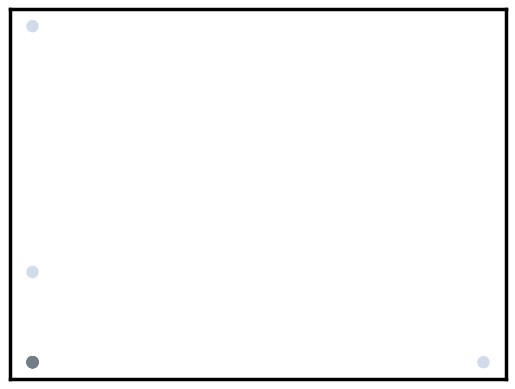

In [551]:
plot_clusters(
    df_tf_idf.to_numpy(),
    cluster.KMeans,
    (),
    {'n_clusters': 4},
    {'alpha' : 0.25, 's':80, 'linewidths': 0}
)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


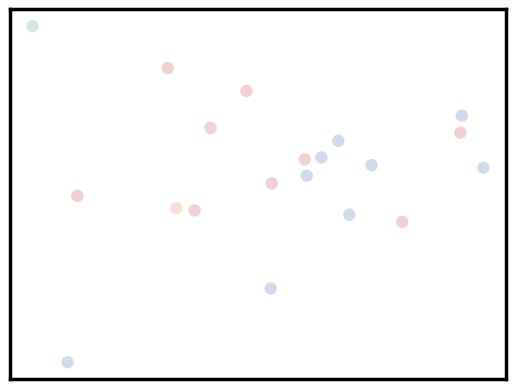

In [552]:
plot_clusters(
    word2vec,
    cluster.KMeans,
    (),
    {'n_clusters': 4},
    {'alpha' : 0.25, 's':80, 'linewidths': 0}
)

### Spectral Clustering (k = 6)

[2 0 5 3 5 1 1 3 4 4 0 5 3 5 4 1 4 2 1 5]


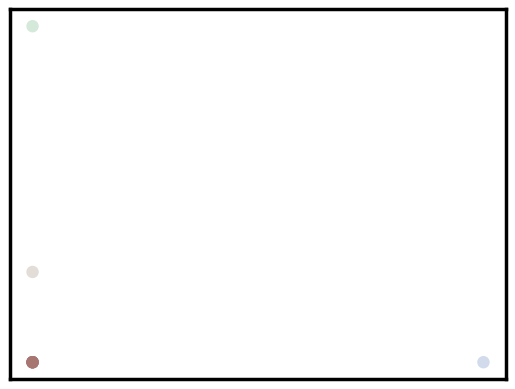

In [553]:
plot_clusters(
    df_tf_idf.to_numpy(),
    cluster.SpectralClustering,
    (),
    {'n_clusters': 6},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

[5 5 0 3 3 3 0 3 4 0 5 0 1 5 4 0 0 2 0 5]


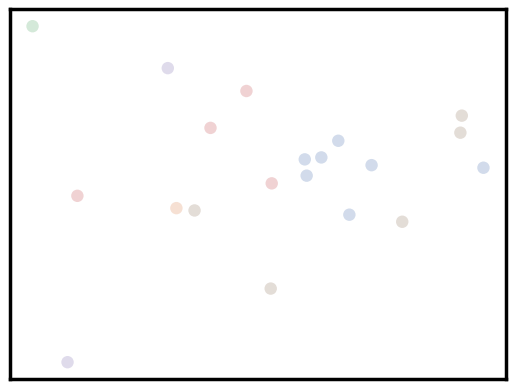

In [554]:
plot_clusters(
    word2vec,
    cluster.SpectralClustering,
    (),
    {'n_clusters': 6},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

### Gaussian Mixture

In [555]:
import sklearn.mixture as GMM

[1 4 1 1 1 1 1 3 2 1 5 1 2 1 1 0 1 1 0 1]


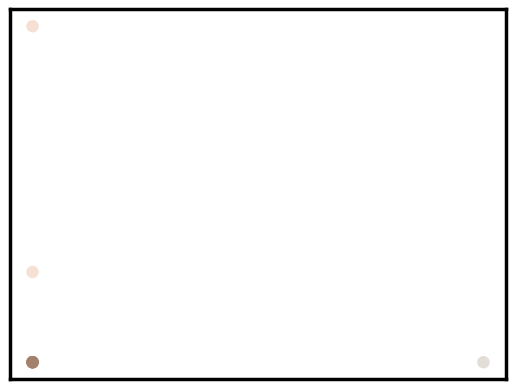

In [556]:
plot_clusters(
    df_tf_idf.to_numpy(),
    GMM.GaussianMixture,
    (),
    {'n_components': 6},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

[0 0 4 5 3 3 5 3 4 0 5 4 1 0 5 3 4 2 4 0]


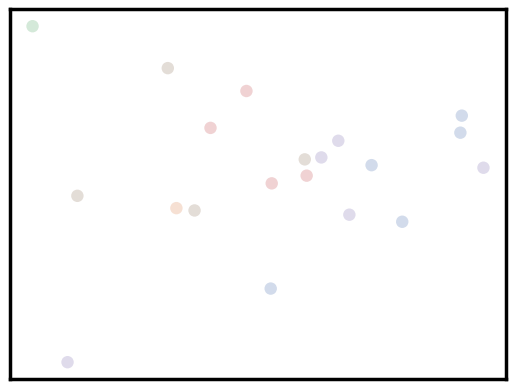

In [557]:
plot_clusters(
    word2vec,
    GMM.GaussianMixture,
    (),
    {'n_components': 6},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

### Agglomerative Clustering

[1 0 1 2 1 1 0 2 0 1 0 1 3 1 0 1 1 1 0 1]


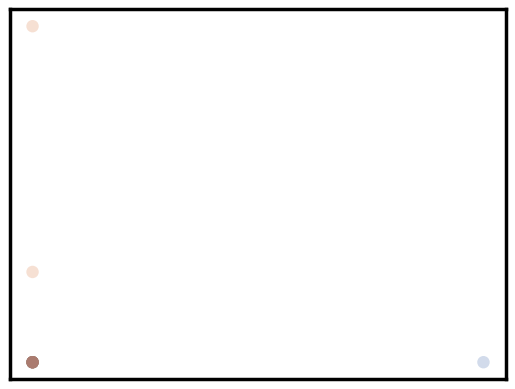

In [558]:
plot_clusters(
    df_tf_idf.to_numpy(),
    cluster.AgglomerativeClustering,
    (),
    {'n_clusters': 4},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

[0 0 0 1 1 1 1 1 0 0 1 0 3 0 1 0 0 2 0 0]


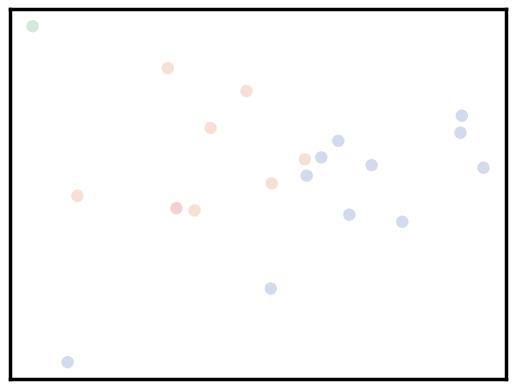

In [559]:
plot_clusters(
    word2vec,
    cluster.AgglomerativeClustering,
    (),
    {'n_clusters': 4},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

### DBSCAN

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


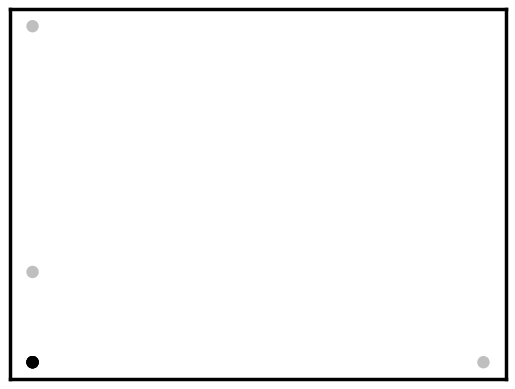

In [560]:
plot_clusters(
    df_tf_idf.to_numpy(),
    cluster.DBSCAN,
    (),
    {'eps': 0.025},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


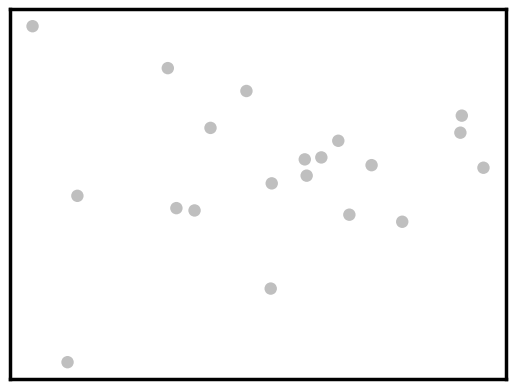

In [561]:
plot_clusters(
    word2vec,
    cluster.DBSCAN,
    (),
    {'eps': 0.025},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

### HDBSCAN

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


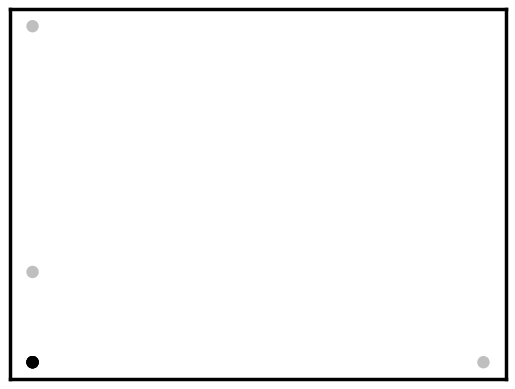

In [562]:
plot_clusters(
    df_tf_idf.to_numpy(),
    cluster.HDBSCAN,
    (),
    {},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


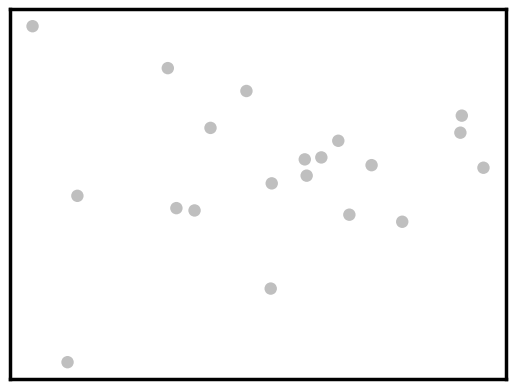

In [563]:
plot_clusters(
    word2vec,
    cluster.HDBSCAN,
    (),
    {},
    {'alpha' : 0.25, 's':80, 'linewidths': 0},
    view_labels = True
)

# Classificação
---
Classificação do dataset [Twitter us airline sentiment](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

<font color = "red">Importante <font>

Para o pleno funcionamento de todo o projeto é necessário que o arquivo ``Tweets.csv`` seja inserido. Portando faça o upload corretamente na célula abaixo:

In [564]:
from google.colab import files
uploaded =  files.upload()

Saving Tweets.csv to Tweets (2).csv


Analisando o conjunto de dados

In [565]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [566]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [567]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


Obtendo os tipos de sentimentos possíveis

In [568]:
sentiments = df['airline_sentiment']
targets = sentiments.unique()
targets

array(['neutral', 'positive', 'negative'], dtype=object)

In [569]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

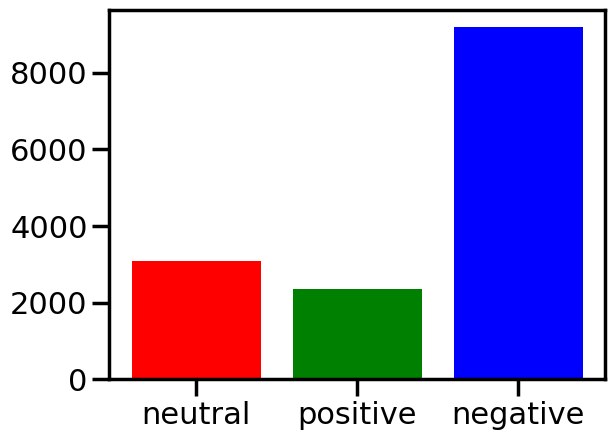

In [570]:
quantities = []
quantities.append(len(df[df['airline_sentiment'] == 'neutral']))
quantities.append(len(df[df['airline_sentiment'] == 'positive']))
quantities.append(len(df[df['airline_sentiment'] == 'negative']))
plt.bar(targets, quantities, color=['red','green', 'blue'])

Obtendo os valores a serem preditos (x) e os targets (y).

<font color = "red">NOTA</font>: Para que seja possível a execução de todas as células rapidamente apenas uma parte do conjunto de dados está sendo levada em conta. Portanto, se quiser executar os modelos para o dataset completo, comente as linhas indicadas na célula abaixo:

In [571]:
X = df['text']
Y = df['airline_sentiment']

X = X[:20] # comente aqui
Y = Y[:20] # e aqui para executar com todo o dataset.

## Pré-Processamento
---

In [572]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [573]:
def remove_special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum() or x == ' ':
      reviews = reviews + x
  return reviews

In [574]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

In [575]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

In [576]:
def preprocess(text_list):
  preprocessed = []
  for text in text_list:
    remove = re.compile(r'')
    text = re.sub(remove, '', text)
    text = remove_special_char(text)
    text = text.lower()
    text = remove_stopwords(text)
    text = lemmatize_word(text)

    preprocessed.append(text)
  return preprocessed

Aplicando o pré-processamento

In [577]:
print(f'Anterior ao pre processamento: {X[0]}')
X = preprocess(X)
print(f'Apos o pre processamento: {X[2]}')

Anterior ao pre processamento: @VirginAmerica What @dhepburn said.
Apos o pre processamento: virginamerica didnt today must mean need take another trip


## Representação Textual

In [578]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Tf idf

In [579]:
tf_idf = TfidfTransformer()
cv = CountVectorizer(max_features = 5000)

In [580]:
def represent_tf_idf(corpus):
  corpus = cv.fit_transform(corpus).toarray()
  corpus = tf_idf.fit_transform(corpus).toarray()
  return corpus

In [581]:
X_tf_idf = np.array(X)
X_tf_idf = represent_tf_idf(X)

Word2Vec

In [582]:
X_w2v = np.array([nlp(sentence).vector for sentence in X])

In [583]:
print('Dimensões do X para tf_idf: ', X_tf_idf.shape)
print('Dimensões do X para w2v: ', X_w2v.shape)
print('Dimensões do Target: ', Y.shape)

Dimensões do X para tf_idf:  (20, 138)
Dimensões do X para w2v:  (20, 96)
Dimensões do Target:  (20,)


## Classificação

In [584]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

Split para treino e teste

In [585]:
x_tf_idf_train, x_tf_idf_test, y_tf_idf_train, y_tf_idf_test = train_test_split(
    X_tf_idf, Y,
    test_size = 0.1,
    random_state = 0,
    shuffle = True
)

print(len(x_tf_idf_train))
print(len(x_tf_idf_test))

18
2


In [586]:
x_w2v_train, x_w2v_test, y_w2v_train, y_w2v_test = train_test_split(
    X_w2v, Y,
    test_size = 0.1,
    random_state = 0,
    shuffle = True
)

print(len(x_w2v_train))
print(len(x_w2v_test))

18
2


In [587]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [588]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1score, support = score(y_test, y_pred, average = 'micro')
    print('-------- MODEL EVALUATION -------- ')
    print(f'Test accuracy: {round(accuracy, 2)}')
    print(f'Test precision: {round(precision, 2)}')
    print(f'Test f1score: {round(f1score, 2)}')
    print(f'Test recall: {round(recall,2)}')

In [589]:
def train_model(name, x_train, x_test, y_train, y_test):
  model = ""
  if name == 'Multinomial Naive Bayes':
    model = MultinomialNB(alpha = 1.0, fit_prior = True)
  elif name == 'Decision Tree':
    model = DecisionTreeClassifier()
  elif name == 'SVM':
    model = SVC()
  elif name == 'XGBOOST':
    model = GradientBoostingClassifier(n_estimators = 100, criterion = 'squared_error', random_state = 0)
  elif name == 'Logistic Regression':
    model = LogisticRegression()
  elif name == 'Random Forest':
    model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
  else:
    print('There is no such classifier')
    return None
  oneVsRest = OneVsRestClassifier(model)
  oneVsRest.fit(x_train, y_train)
  evaluate_model(oneVsRest, x_test, y_test)

  return oneVsRest

In [590]:
pred_list = ['I hate the ariplane company', 'I love airplanes']
y_pred1 = cv.transform(pred_list).toarray()
y_pred1_tf_idf = tf_idf.transform(y_pred1).toarray()
y_pred1_w2v = np.array([nlp(sentence).vector for sentence in pred_list])

print(y_pred1_tf_idf.shape)
print(y_pred1_w2v.shape)


(2, 138)
(2, 96)


### Naive Bayes

In [591]:
classifier_tf_idf = train_model(
    'Multinomial Naive Bayes',
    x_tf_idf_train,
    x_tf_idf_test,
    y_tf_idf_train,
    y_tf_idf_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [592]:
classifier_tf_idf.predict(y_pred1_tf_idf)

array(['positive', 'positive'], dtype='<U8')

In [593]:
# classifier_w2v = train_model(
#     'Multinomial Naive Bayes',
#     x_w2v_train,
#     x_w2v_test,
#     y_w2v_train,
#     y_w2v_test,
# )

In [594]:
# classifier_w2v.predict(y_pred1_w2v)

### Árvore de Decisão

In [595]:
classifier_tf_idf = train_model(
   'Decision Tree',
    x_tf_idf_train,
    x_tf_idf_test,
    y_tf_idf_train,
    y_tf_idf_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [596]:
classifier_tf_idf.predict(y_pred1_tf_idf)

array(['positive', 'positive'], dtype='<U8')

In [597]:
classifier_w2v = train_model(
    'Decision Tree',
    x_w2v_train,
    x_w2v_test,
    y_w2v_train,
    y_w2v_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [598]:
classifier_w2v.predict(y_pred1_w2v)

array(['positive', 'positive'], dtype='<U8')

### SVM

In [599]:
classifier_tf_idf = train_model(
   'SVM',
    x_tf_idf_train,
    x_tf_idf_test,
    y_tf_idf_train,
    y_tf_idf_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [600]:
classifier_tf_idf.predict(y_pred1_tf_idf)

array(['positive', 'positive'], dtype='<U8')

In [601]:
classifier_w2v = train_model(
   'SVM',
    x_w2v_train,
    x_w2v_test,
    y_w2v_train,
    y_w2v_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [602]:
classifier_w2v.predict(y_pred1_w2v)

array(['positive', 'positive'], dtype='<U8')

### Regressão Logística

In [603]:
classifier_tf_idf = train_model(
   'Logistic Regression',
    x_tf_idf_train,
    x_tf_idf_test,
    y_tf_idf_train,
    y_tf_idf_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [604]:
classifier_tf_idf.predict(y_pred1_tf_idf)

array(['positive', 'positive'], dtype='<U8')

In [605]:
classifier_w2v = train_model(
   'Logistic Regression',
    x_w2v_train,
    x_w2v_test,
    y_w2v_train,
    y_w2v_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [606]:
classifier_w2v.predict(y_pred1_w2v)

array(['neutral', 'positive'], dtype='<U8')

### XGBoost

In [607]:
classifier_tf_idf = train_model(
   'XGBOOST',
    x_tf_idf_train,
    x_tf_idf_test,
    y_tf_idf_train,
    y_tf_idf_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [608]:
classifier_tf_idf.predict(y_pred1_tf_idf)

array(['positive', 'positive'], dtype='<U8')

In [609]:
classifier_w2v = train_model(
   'XGBOOST',
    x_w2v_train,
    x_w2v_test,
    y_w2v_train,
    y_w2v_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [610]:
classifier_w2v.predict(y_pred1_w2v)

array(['positive', 'positive'], dtype='<U8')

### Random Forest

In [611]:
classifier_tf_idf = train_model(
   'Random Forest',
    x_tf_idf_train,
    x_tf_idf_test,
    y_tf_idf_train,
    y_tf_idf_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [612]:
classifier_tf_idf.predict(y_pred1_tf_idf)

array(['positive', 'positive'], dtype='<U8')

In [613]:
classifier_w2v = train_model(
   'Random Forest',
    x_w2v_train,
    x_w2v_test,
    y_w2v_train,
    y_w2v_test,
)

-------- MODEL EVALUATION -------- 
Test accuracy: 1.0
Test precision: 1.0
Test f1score: 1.0
Test recall: 1.0


In [614]:
classifier_w2v.predict(y_pred1_w2v)

array(['neutral', 'neutral'], dtype='<U8')